In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

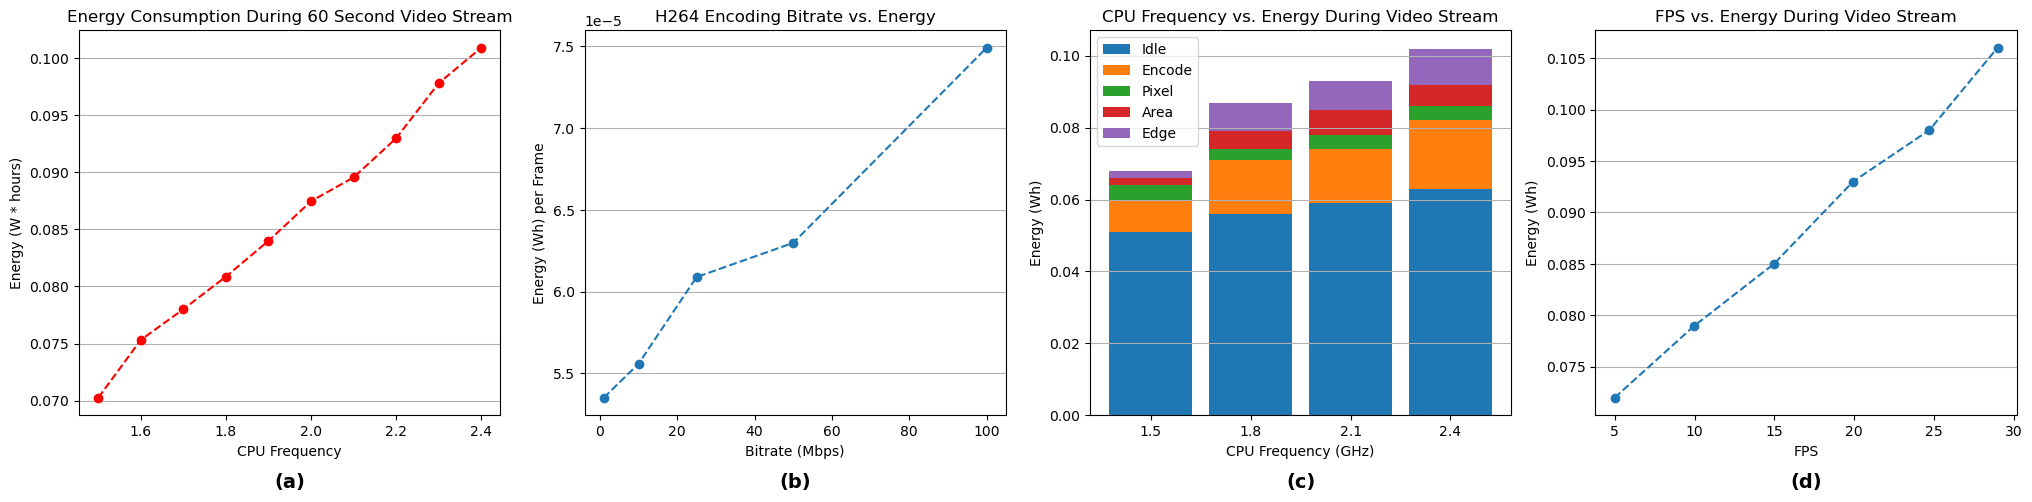

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))

# CPU Freq to energy
cpu_freq = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]#, 'On\nDemand']
energy = [0.07025120551138889, 0.07532035703416666, 0.0780035295825, 0.08085777007083333, 0.08398784145, 0.0874561251675, 0.08954470838138891, 0.09296977443194447, 0.09778925191138887, 0.10089725351333331]#, 0.10073558033444444]

ax1.plot(cpu_freq, energy, 'ro--')
ax1.set_title('Energy Consumption During 60 Second Video Stream')
# ax1.set_xticklabels(cpu_freq, rotation=45)
ax1.set_xlabel('CPU Frequency')
ax1.set_ylabel('Energy (W * hours)')
ax1.grid(True, axis='y')


# H264 Bitrate to energy
bitrate_energy = [0.096, 0.099, 0.104, 0.109, 0.104]
bitrate_energy_fps = [0.096 / 29.899, 0.099 / 29.681, 0.104 / 28.464, 0.109 / 28.842, 0.104 / 23.135]
for i in range(len(bitrate_energy_fps)):
    bitrate_energy_fps[i] = bitrate_energy_fps[i] / 60 # Convert to energy / frame instead of energy / fps
bitrates = [1, 10, 25, 50, 100]

ax2.plot(bitrates, bitrate_energy_fps, 'o--')
ax2.set_title('H264 Encoding Bitrate vs. Energy')
ax2.set_xlabel('Bitrate (Mbps)')
ax2.set_ylabel('Energy (Wh) per Frame')
ax2.grid(True, axis='y')


cpu_freq = np.array([1.5, 1.8, 2.1, 2.4])
idle_energy = np.array([0.051, 0.056, 0.059, 0.063])
encode_energy = np.array([0.06, 0.071, 0.074, 0.082]) # Read, encode
pixel_encode_energy = np.array([0.064, 0.074, 0.078, 0.086]) # Read, encode, feature
area_encode_energy = np.array([0.066, 0.079, 0.085, 0.092]) # Read, encode, feature
edge_encode_energy = np.array([0.068, 0.087, 0.093, 0.102]) # Read, encode, feature

bar_width = 0.25
ax3.bar(cpu_freq, idle_energy, width=bar_width, label='Idle')
ax3.bar(cpu_freq, encode_energy-idle_energy, width=bar_width, bottom=idle_energy, label='Encode')
ax3.bar(cpu_freq, pixel_encode_energy-encode_energy, width=bar_width, bottom=encode_energy, label='Pixel')
ax3.bar(cpu_freq, area_encode_energy-pixel_encode_energy, width=bar_width, bottom=pixel_encode_energy, label='Area')
ax3.bar(cpu_freq, edge_encode_energy-area_encode_energy, width=bar_width, bottom=area_encode_energy, label='Edge')
ax3.set_xticks(cpu_freq)
ax3.set_title('CPU Frequency vs. Energy During Video Stream')
ax3.set_xlabel('CPU Frequency (GHz)')
ax3.set_ylabel('Energy (Wh)')
ax3.grid(True, axis='y')
ax3.legend()


# FPS to Energy
fps = [4.99, 9.99, 14.97, 19.93, 24.71, 28.98]
encoding_energy_2_4ghz = [0.072, 0.079, 0.085, 0.093, 0.098, 0.106]
ax4.plot(fps, encoding_energy_2_4ghz, 'o--')
ax4.set_title('FPS vs. Energy During Video Stream')
ax4.set_xlabel('FPS')
ax4.set_ylabel('Energy (Wh)')
ax4.grid(True, axis='y')

labels = [r'(a)', r'(b)', r'(c)', r'(d)']
positions = [(0.5, -0.15)] * 4  # Centered below each subplot

# Add labels below each subplot
for ax, label, pos in zip([ax1,ax2,ax3,ax4], labels, positions):
    ax.text(pos[0], pos[1], label, transform=ax.transAxes, weight='bold', fontsize=14, ha='center', va='top')

plt.show()